In [2]:
import pandas

csv = pandas.read_csv("dft_rawcount_local_authority_id_65.csv")

In [3]:
for row in csv.values:
    row
row

array([808654, 'E', 2020, '2020-09-10', 18, 9, 'South East', 65,
       'Hampshire', 'B3400', 'Minor', nan, nan, 446309, 148114, 51.230342,
       -1.3381511, nan, nan, 1, 6, 116, 2, 14, 1, 1, 0, 0, 0, 0, 2, 140],
      dtype=object)

In [4]:
csv.columns

Index(['count_point_id', 'direction_of_travel', 'year', 'count_date', 'hour',
       'region_id', 'region_name', 'local_authority_id',
       'local_authority_name', 'road_name', 'road_type',
       'start_junction_road_name', 'end_junction_road_name', 'easting',
       'northing', 'latitude', 'longitude', 'link_length_km',
       'link_length_miles', 'pedal_cycles', 'two_wheeled_motor_vehicles',
       'cars_and_taxis', 'buses_and_coaches', 'lgvs', 'hgvs_2_rigid_axle',
       'hgvs_3_rigid_axle', 'hgvs_4_or_more_rigid_axle',
       'hgvs_3_or_4_articulated_axle', 'hgvs_5_articulated_axle',
       'hgvs_6_articulated_axle', 'all_hgvs', 'all_motor_vehicles'],
      dtype='object')

In [5]:
latitude = list(csv.columns).index("latitude")
longitude = list(csv.columns).index("longitude")
latitudes = []
longitudes = []
pairs = []
for row in csv.values:
    lat = float(row[latitude])
    longi = float(row[longitude])
    if not([lat,longi] in pairs):
        latitudes.append(lat)
        longitudes.append(longi)
        pairs.append([lat,longi])

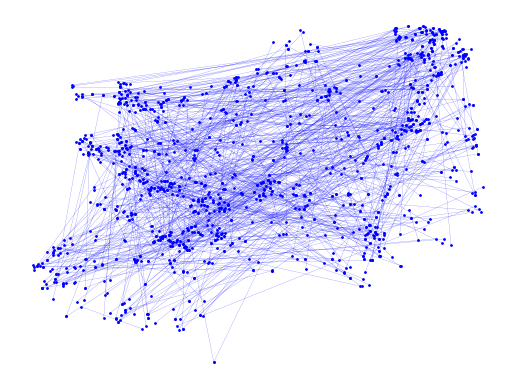

In [6]:
from matplotlib import pyplot as plt
counter = 0
fig, ax = plt.subplots()
ax.axis("off")
for i in range(0,len(latitudes),2):
    x,y = latitudes[i],longitudes[i]
    ax.plot(latitudes[i:i+2], longitudes[i:i+2], 'bo-', linewidth=0.1, markersize=1)
    counter += 1
ax.set(frame_on=False) 
plt.show()

In [7]:
from geopy.geocoders import ArcGIS
nom=ArcGIS()
lati,longi = nom.geocode("hampshire")[-1]

In [27]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

import random

#creating random data
df = pd.DataFrame({'lat':latitudes,
       'lon':longitudes, 
       "color":["red" for i in range(len(latitudes))]})

fig = px.scatter_mapbox(df, 
                        lat='lat',
                        lon='lon',
                        center={'lat':lati,
                                'lon':longi},
                        )




fig.update_layout(mapbox_style='open-street-map')
# fig = fig.update_traces(marker_line_width=0.1)

fig.show()

In [9]:
fig

In [95]:
np.ones(len(latitudes))

array([1., 1., 1., ..., 1., 1., 1.])